In [82]:
%load_ext autoreload
%autoreload 2
#Basic package
import math
import random
import time
import numpy as np
import pandas as pd
import xlwt
#ML
from scipy.spatial.distance import cdist
from scipy.cluster.vq import vq
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans  
from sklearn.datasets import make_blobs
from sklearn import cluster, datasets
#Plot
from matplotlib.pyplot import *
from pylab import *
import matplotlib.pyplot as plt
#functions for the framework
from util import *
from related_SM_algorithm import *

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data visulazation

* a1.csv: 20 clusters
* a2.csv: 35 clusters
* a3.csv: 50 clusters
* s1.csv: 9% overlap
* s2.csv: 22% overlap
* s3.csv: 41% overlap
* s4.csv: 44% overlap
* unbalance.csv
* dim032.csv  
* dim064.csv
* dim128.csv
* dim256.csv
* dim512.csv
* dim 1024.csv
* birch1.csv
* birch2.csv
* birch3.csv

In [44]:
##################
data = 'a1.csv'
##################

##  Visual Raw Data and Ground Truth

(3000, 2)
(20, 2) <class 'numpy.ndarray'>


Text(0.5, 1.0, 'a1')

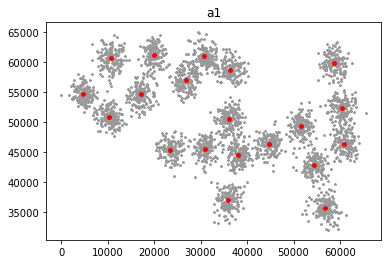

In [45]:
dataMat = pd.read_csv('./Raw_data/all/'+data, header=None, dtype=np.float64).values
print(dataMat.shape)
plt.scatter(dataMat[:, 0],dataMat[:, 1], s=5, c='0.6', marker='*')

gt = pd.read_csv('./Groundtruth/all/'+data, dtype=np.float64).values
print(gt.shape,type(gt))
#plot(gt[:, 0],gt[:, 1], 'k*',markerfacecolor=(0.5, 0.5, 0.5, 0.1), markersize=4)
plt.scatter(gt[:, 0],gt[:, 1], s=15, c='r', marker='o')
plt.title(data.strip(".csv"))

# Experiment Setting

In [36]:
def expriment_xmeans(data, trials, data_gt=None, start_k='1', init_method='random', maxIter=30):
    if data_gt==None:
        data_gt = data
    ####raw_data####
    X = pd.read_csv('./Raw_data/all/'+data, header=None, dtype=np.float64).values 
    ####ground truth####
    gt = pd.read_csv('./Groundtruth/all/'+data_gt, dtype=np.float64).values
    ##################
    ####setting####
    ##################
    k = len(gt)
    SSE_list = []
    CI_list = []
    Iters = []
    K_num = []
    Success_rate = 0 
    ##################
    ####Groud truth SSE
    ##################
    gt_model = KMeans(n_clusters=k,init=gt, random_state = 0, n_init=1, algorithm='full').fit(X)
    gt_sse = gt_model.inertia_
    ##################          
    #Main Loop
    ################## 
    start_time=time.time()
    for i in range(trials):
        if start_k == '1':
            xm = XMeans(n_init=1,random_state = i)
            xm.fit(X,1)
            store_C = [xm.cluster_centers_]
            SSE = [xm.inertia_]
            iter_num = xm.iter_
        elif start_k == 'half k':
            xm = XMeans(n_init=1,random_state = i)
            xm.fit(X,int(k/2))
            store_C = [xm.cluster_centers_]
            SSE = [xm.inertia_]
            iter_num = xm.iter_
        elif start_k == 'entire k':
            xm = XMeans(n_init=1,random_state = i)
            xm.fit(X,int(k))
            store_C = [xm.cluster_centers_]
            SSE = [xm.inertia_]
            iter_num = xm.iter_   
        else:
            return "error","error"   
        ##################          
        #Centroid Index
        ################## 
        CI = Centroid_Index_diff(gt,store_C[-1]) 
        CI_list.append(CI)
        SSE_list.append(SSE[-1])
        if CI == 0:
            Success_rate+=1 
        Iters.append(iter_num)
        K_num.append(len(store_C[-1]))
    Success_rate = Success_rate/trials * 100
    AMR = np.mean(CI_list)/k
    SSE_ratio = np.array(SSE_list)/gt_sse
    SSE_ratio_mean = np.mean(SSE_ratio)
    SSE_ratio_std = np.std(SSE_ratio)
    Iters_mean = np.mean(Iters)
    Average_k = np.mean(K_num)
    elapse_time = time.time()-start_time
    
    return (Success_rate, AMR, SSE_ratio_mean, SSE_ratio_std, Iters_mean, Average_k, elapse_time)

## Experiment on Datasets

### X-means with centroid Index diff to evaluate

In [28]:
experiment_record = {}
datasets = ['a1.csv', 'a2.csv', 'a3.csv',
           's1.csv', 's2.csv', 's3.csv','s4.csv',
           'unbalance.csv','dim032.csv','birch1.csv']
           #['a1_vary.csv', 'a2_vary.csv', 'a3_vary.csv', 'a3_vary2.csv' ]
           #['dim032.csv','dim064.csv','dim128.csv','dim256.csv','dim512.csv','dim1024.csv']
           #['a1.csv', 'a2.csv', 'a3.csv']
           #['s1.csv', 's2.csv', 's3.csv','s4.csv']
           #['dim032.csv','dim064.csv','dim128.csv','dim256.csv','dim512.csv','dim1024.csv']
           #['unbalance.csv','birch1.csv' ]
            
#datasets_gt = ['a1.csv', 'a2.csv']
Start_K = ['1','half k','entire k']

for index, data in enumerate(datasets):
    print (data)
    for sub_index, start_k in enumerate(Start_K):
        Success_rate, AMR, SSE_ratio_mean, SSE_ratio_std, Iters_mean, Average_k, elapse_time=expriment_xmeans(data, trials=100, data_gt=None, start_k=start_k)
        experiment_record[index*3+sub_index]= {'dataset': data,
                                               'lower_bound K': start_k,
                                               'success_rate': Success_rate,
                                               'AMR': AMR,
                                               'SSE_ratio_mean': SSE_ratio_mean,
                                               'SSE_ratio_std': SSE_ratio_std,
                                               'Iters': Iters_mean,
                                               'Aver K': Average_k,
                                               'Time': elapse_time}

    
pd.DataFrame.from_dict(experiment_record, orient='index')

a1.csv
a2.csv
a3.csv
s1.csv
s2.csv
s3.csv
s4.csv
unbalance.csv
dim032.csv
birch1.csv


,dataset,lower_bound K,success_rate,AMR,SSE_ratio_mean,SSE_ratio_std,Iters,Aver K,Time
0,a1.csv,1,100.0,0.000000,0.950774,5.580462e-02,6.60,22.52,22.174488
1,a1.csv,half k,100.0,0.000000,0.963659,5.696470e-02,3.52,21.88,18.422973
2,a1.csv,entire k,100.0,0.000000,0.971286,5.828962e-02,1.93,21.51,12.562538
3,a2.csv,1,100.0,0.000000,0.953178,3.613535e-02,9.27,39.20,53.634834
4,a2.csv,half k,100.0,0.000000,0.953871,3.571115e-02,4.47,39.14,46.428837
5,a2.csv,entire k,100.0,0.000000,0.958007,3.650983e-02,3.36,38.76,43.189952
6,a3.csv,1,0.0,0.980000,162.669081,2.842171e-14,1.00,1.00,3.877717
7,a3.csv,half k,0.0,0.085200,1.412712,1.140616e-01,2.00,46.07,26.365159
8,a3.csv,entire k,4.0,0.031400,1.134826,6.252449e-02,1.00,50.00,18.435198
9,s1.csv,1,0.0,0.933333,64.680125,2.842171e-14,1.00,1.00,3.243714


In [29]:
#save dataframe
pd.DataFrame.from_dict(experiment_record, orient='index').to_csv('xmeans_v1.csv')

### Forced K-means(2006)

In [98]:
def expriment_forced(data, trials, data_gt=None, init_method='random', maxIter=30):
    if data_gt==None:
        data_gt = data
    ####raw_data####
    X = pd.read_csv('./Raw_data/all/'+data, header=None, dtype=np.float64).values 
    ####ground truth####
    gt = pd.read_csv('./Groundtruth/all/'+data_gt, dtype=np.float64).values
    ##################
    ####setting####
    ##################
    k = len(gt)
    SSE_list = []
    CI_list = []
    Iters = []
    K_num = []
    Success_rate = 0 
    ##################
    ####Groud truth SSE
    ##################
    gt_model = KMeans(n_clusters=k,init=gt, random_state = 0, n_init=1, algorithm='full').fit(X)
    gt_sse = gt_model.inertia_
    ##################          
    #Main Loop
    ################## 
    start_time=time.time()
    for i in range(trials):
        store_C,SSE = Frce_kmeans(X, k, seed=i, kmax=4)
        ##################          
        #Centroid Index
        ################## 
        CI = Centroid_Index(gt,store_C[-1]) 
        CI_list.append(CI)
        SSE_list.append(SSE[-1])
        if CI == 0:
            Success_rate+=1 
        K_num.append(len(store_C[-1]))
    Success_rate = Success_rate/trials * 100
    AMR = np.mean(CI_list)/k
    SSE_ratio = np.array(SSE_list)/gt_sse
    SSE_ratio_mean = np.mean(SSE_ratio)
    SSE_ratio_std = np.std(SSE_ratio)
    Iters_mean = 1 #forced alg only have one iter
    elapse_time = time.time()-start_time
    
    return (Success_rate, AMR, SSE_ratio_mean, SSE_ratio_std, Iters_mean, elapse_time)

In [99]:
experiment_record = {}
datasets = ['a1.csv', 'a2.csv', 'a3.csv',
           's1.csv', 's2.csv', 's3.csv','s4.csv',
           'unbalance.csv','dim032.csv','birch1.csv']

for index, data in enumerate(datasets):
    print (data)

    Success_rate, AMR, SSE_ratio_mean, SSE_ratio_std, Iters_mean, elapse_time=expriment_forced(data, trials=100, data_gt=None)
    experiment_record[index*1]= {'dataset': data,
                                       'success_rate': Success_rate,
                                       'AMR': AMR,
                                       'SSE_ratio_mean': SSE_ratio_mean,
                                       'SSE_ratio_std': SSE_ratio_std,
                                       'Iters': Iters_mean,
                                       'Time': elapse_time}

    
pd.DataFrame.from_dict(experiment_record, orient='index')

a1.csv
a2.csv
a3.csv
s1.csv
s2.csv
s3.csv
s4.csv
unbalance.csv
dim032.csv
birch1.csv


,dataset,success_rate,AMR,SSE_ratio_mean,SSE_ratio_std,Iters,Time
0,a1.csv,99.0,0.000500,1.001811,0.020743,1,113.056166
1,a2.csv,96.0,0.001429,1.005119,0.027432,1,218.077200
2,a3.csv,99.0,0.000200,1.000812,0.007661,1,360.205819
3,s1.csv,100.0,0.000000,1.000034,0.000070,1,90.021318
4,s2.csv,90.0,0.006667,1.020667,0.062980,1,91.846046
5,s3.csv,72.0,0.019333,1.034014,0.055961,1,94.007788
6,s4.csv,29.0,0.054667,1.055210,0.045246,1,91.901960
7,unbalance.csv,17.0,0.411250,5.141560,1.915673,1,54.521677
8,dim032.csv,94.0,0.003750,1.697177,2.764607,1,490.740201
9,birch1.csv,100.0,0.000000,1.000018,0.000034,1,1524.926791


In [101]:
#save dataframe
pd.DataFrame.from_dict(experiment_record, orient='index').to_csv('Forced_v2.csv')

### Dissimilar K-means(2016) in our framework

In [86]:
def expriment(data, trials, data_gt=None, ofm_method='std', init_method='random', maxIter=30, radius_method='min', start_epsilon=1):
    if data_gt==None:
        data_gt = data
    ####raw_data####
    X = pd.read_csv('./Raw_data/all/'+data, header=None, dtype=np.float64).values 
    ####ground truth####
    gt = pd.read_csv('./Groundtruth/all/'+data_gt, dtype=np.float64).values
    ##################
    ####setting####
    ##################
    k = len(gt)
    SSE_list = []
    CI_list = []
    Iters = []
    Success_rate = 0 
    ##################
    ####Groud truth SSE
    ##################
    gt_model = KMeans(n_clusters=k,init=gt, random_state = 0, n_init=1, algorithm='full').fit(X)
    gt_sse = gt_model.inertia_
    ##################          
    #Main Loop
    ################## 
    start_time=time.time()
    next_seed = 0
    for i in range(trials):
        if ofm_method == 'std++':
            store_C,SSE,next_seed, _,_ = FissionFusion(X, k, seed=next_seed, 
                                                   ofm_method=ofm_method, init_method='k-means++', 
                                                   radius_method=radius_method,
                                                   maxIter=2*k,
                                                   start_epsilon=start_epsilon)            
        else:
            store_C,SSE,next_seed, _,_ = FissionFusion(X, k, seed=next_seed, 
                                                   ofm_method=ofm_method, init_method=init_method, 
                                                   radius_method=radius_method,
                                                   maxIter=2*k,
                                                   start_epsilon=start_epsilon)
        ##################          
        #Centroid Index
        ################## 
        CI = Centroid_Index(gt,store_C[-1])
        CI_list.append(CI)
        SSE_list.append(SSE[-1])
        if CI == 0:
            Success_rate+=1 
        Iters.append(len(store_C))
    Success_rate = Success_rate/trials * 100
    AMR = np.mean(CI_list)/k
    SSE_ratio = np.array(SSE_list)/gt_sse
    SSE_ratio_mean = np.mean(SSE_ratio)
    SSE_ratio_std = np.std(SSE_ratio)
    Iters_mean = np.mean(Iters)
    elapse_time = time.time()-start_time
    
    return (Success_rate, AMR, SSE_ratio_mean, SSE_ratio_std, Iters_mean, elapse_time)

In [88]:
experiment_record = {}
datasets = ['a1.csv', 'a2.csv', 'a3.csv',
           's1.csv', 's2.csv', 's3.csv','s4.csv',
           'unbalance.csv','dim032.csv','birch1.csv']
           #['a1_vary.csv', 'a2_vary.csv', 'a3_vary.csv', 'a3_vary2.csv' ]
           #['dim032.csv','dim064.csv','dim128.csv','dim256.csv','dim512.csv','dim1024.csv']
           #['a1.csv', 'a2.csv', 'a3.csv']
           #['s1.csv', 's2.csv', 's3.csv','s4.csv']
           #['dim032.csv','dim064.csv','dim128.csv','dim256.csv','dim512.csv','dim1024.csv']
           #['unbalance.csv','birch1.csv' ]
            
#datasets_gt = ['a1.csv', 'a2.csv']
algorithm = ['dissimilar']

for index, data in enumerate(datasets):
    print (data)
    for sub_index, ofm_method in enumerate(algorithm):
        Success_rate, AMR, SSE_ratio_mean, SSE_ratio_std, Iters_mean, elapse_time = expriment(data, trials=100, 
        data_gt=None, ofm_method='dissimilar', init_method='random', radius_method='min', start_epsilon=1)
        experiment_record[index*3+sub_index]= {'dataset': data,
                                               'method': ofm_method,
                                               'success_rate': Success_rate,
                                               'AMR': AMR,
                                               'SSE_ratio_mean': SSE_ratio_mean,
                                               'SSE_ratio_std': SSE_ratio_std,
                                               'Iters': Iters_mean,
                                               'Time': elapse_time}

    
pd.DataFrame.from_dict(experiment_record, orient='index')

a1.csv
a2.csv
a3.csv
s1.csv
s2.csv
s3.csv
s4.csv
unbalance.csv
dim032.csv
birch1.csv


,dataset,method,success_rate,AMR,SSE_ratio_mean,SSE_ratio_std,Iters,Time
0,a1.csv,dissimilar,90.0,0.005000,1.020454,6.241198e-02,35.40,163.365635
3,a2.csv,dissimilar,85.0,0.005429,1.023477,5.999459e-02,9.92,92.845044
6,a3.csv,dissimilar,50.0,0.034200,1.155507,1.997361e-01,29.03,390.577801
9,s1.csv,dissimilar,100.0,0.000000,0.999999,2.600728e-05,3.75,31.602495
12,s2.csv,dissimilar,86.0,0.009333,1.042055,1.053923e-01,7.37,60.452268
15,s3.csv,dissimilar,33.0,0.046000,1.085996,6.330993e-02,3.93,33.769947
18,s4.csv,dissimilar,32.0,0.049333,1.051438,4.249049e-02,4.53,38.754197
21,unbalance.csv,dissimilar,100.0,0.000000,1.000000,2.126881e-16,6.99,67.766774
24,dim032.csv,dissimilar,100.0,0.000000,1.000008,1.641400e-05,5.60,6744.698623
27,birch1.csv,dissimilar,0.0,0.050300,1.135370,4.847865e-02,6.87,1456.636908


In [89]:
#save dataframe
pd.DataFrame.from_dict(experiment_record, orient='index').to_csv('Dissimilar_v1.csv')

### Lloyd K-means n_init = k

In [95]:
# initialization = k
def expriment_lloyd(data, trials, data_gt=None, ofm_method='std', init_method='random', maxIter=30, radius_method='min', start_epsilon=1):
    if data_gt==None:
        data_gt = data
    ####raw_data####
    X = pd.read_csv('./Raw_data/all/'+data, header=None, dtype=np.float64).values 
    ####ground truth####
    gt = pd.read_csv('./Groundtruth/all/'+data_gt, dtype=np.float64).values
    ##################
    ####setting####
    ##################
    k = len(gt)
    SSE_list = []
    CI_list = []
    Iters = []
    Success_rate = 0 
    ##################
    ####Groud truth SSE
    ##################
    gt_model = KMeans(n_clusters=k,init=gt, random_state = 0, n_init=1, algorithm='full').fit(X)
    gt_sse = gt_model.inertia_
    ##################          
    #Main Loop
    ################## 
    start_time=time.time()
    next_seed = 0
    for i in range(trials):
        kms = KMeans(n_clusters=k, init='random', random_state=i, n_init=k,algorithm ='full').fit(X)
        Store_C = [kms.cluster_centers_]
        SSE = [kms.inertia_]
        Iter_num = kms.n_iter_
        ##################          
        #Centroid Index
        ################## 
        CI = Centroid_Index(gt,store_C[-1])
        CI_list.append(CI)
        SSE_list.append(SSE[-1])
        if CI == 0:
            Success_rate+=1 
        Iters.append(Iter_num)
    Success_rate = Success_rate/trials * 100
    AMR = np.mean(CI_list)/k
    SSE_ratio = np.array(SSE_list)/gt_sse
    SSE_ratio_mean = np.mean(SSE_ratio)
    SSE_ratio_std = np.std(SSE_ratio)
    Iters_mean = np.mean(Iters)
    elapse_time = time.time()-start_time
    
    return (Success_rate, AMR, SSE_ratio_mean, SSE_ratio_std, Iters_mean, elapse_time)

In [97]:
experiment_record = {}
datasets = ['a1.csv', 'a2.csv', 'a3.csv',
           's1.csv', 's2.csv', 's3.csv','s4.csv',
           'unbalance.csv','dim032.csv','birch1.csv']
           #['a1_vary.csv', 'a2_vary.csv', 'a3_vary.csv', 'a3_vary2.csv' ]
           #['dim032.csv','dim064.csv','dim128.csv','dim256.csv','dim512.csv','dim1024.csv']
           #['a1.csv', 'a2.csv', 'a3.csv']
           #['s1.csv', 's2.csv', 's3.csv','s4.csv']
           #['dim032.csv','dim064.csv','dim128.csv','dim256.csv','dim512.csv','dim1024.csv']
           #['unbalance.csv','birch1.csv' ]
            
#datasets_gt = ['a1.csv', 'a2.csv']
algorithm = ['Lloyd(K init)']

for index, data in enumerate(datasets):
    print (data)
    for sub_index, ofm_method in enumerate(algorithm):
        Success_rate, AMR, SSE_ratio_mean, SSE_ratio_std, Iters_mean, elapse_time = expriment_lloyd(data, trials=100, 
        data_gt=None, ofm_method='dissimilar', init_method='random', radius_method='min', start_epsilon=1)
        experiment_record[index*3+sub_index]= {'dataset': data,
                                               'method': ofm_method,
                                               'success_rate': Success_rate,
                                               'AMR': AMR,
                                               'SSE_ratio_mean': SSE_ratio_mean,
                                               'SSE_ratio_std': SSE_ratio_std,
                                               'Iters': Iters_mean,
                                               'Time': elapse_time}

    
pd.DataFrame.from_dict(experiment_record, orient='index')

a1.csv
a2.csv
a3.csv
s1.csv
s2.csv
s3.csv
s4.csv
unbalance.csv
dim032.csv
birch1.csv


,dataset,method,success_rate,AMR,SSE_ratio_mean,SSE_ratio_std,Iters,Time
0,a1.csv,Lloyd(K init),100.0,0.000000,1.174927,0.089817,15.14,26.113144
3,a2.csv,Lloyd(K init),0.0,2.857143,1.268250,0.085158,16.02,58.700206
6,a3.csv,Lloyd(K init),0.0,2.000000,1.305214,0.058813,17.06,92.550861
9,s1.csv,Lloyd(K init),0.0,6.666667,1.349296,0.235788,11.00,24.049664
12,s2.csv,Lloyd(K init),0.0,6.666667,1.057693,0.096253,17.30,25.427977
15,s3.csv,Lloyd(K init),0.0,6.666667,1.022683,0.044146,19.56,27.776356
18,s4.csv,Lloyd(K init),0.0,6.666667,1.002330,0.011186,23.13,29.491108
21,unbalance.csv,Lloyd(K init),0.0,12.500000,7.141355,1.701840,6.04,12.386182
24,dim032.csv,Lloyd(K init),0.0,6.250000,21.657851,8.230865,4.16,66.922178
27,birch1.csv,Lloyd(K init),0.0,1.000000,1.089908,0.015501,36.51,1285.068530


# Simple Test

In [51]:
X = dataMat
store_C,sse = Frce_kmeans(X, 20, 0)

<Figure size 432x288 with 0 Axes>

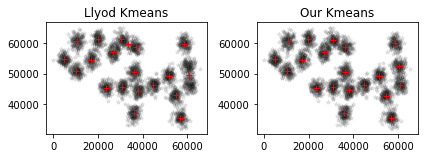

In [69]:
#--------------------------------------------------------------------------------
#------------------------------------Figure--------------------------------------
#--------------------------------------------------------------------------------
figure()
fig = plt.figure()
#Fisrt plot
plt.subplot(121)
ax = plt.subplot(221)
ax.set_title('Llyod Kmeans')
plot(dataMat[:, 0], dataMat[:, 1], 'k*',markerfacecolor=(0.5, 0.5, 0.5, 0.1), markersize=4)
plot(store_C[0][:, 0],store_C[0][:, 1], 'r+')
'''
i = 0
for a,b in zip(store_C[0][:, 0],store_C[0][:, 1]):
    i += 1
    plt.text(a+2, b+2, '%.0f'% i, color = "G", ha='center', va= 'bottom',fontsize=9)
'''
#Second plot
plt.subplot(122)
ax = plt.subplot(222)
ax.set_title('Our Kmeans')
plot(dataMat[:, 0], dataMat[:, 1], 'k*',markerfacecolor=(0.5, 0.5, 0.5, 0.1), markersize=4)
plot(store_C[-1][:, 0],store_C[-1][:, 1], 'r+')
'''
i = 0
for a,b in zip(store_C[-1][:, 0],store_C[-1][:, 1]):
    i += 1
    plt.text(a+2, b+2, '%.0f'% i, color = "G", ha='center', va= 'bottom',fontsize=9)
'''
#adjust entire empty space
fig.tight_layout()

In [68]:
store_C,sse, _, _, _ = FissionFusion(X, 20, 1, ofm_method='dissimilar')